In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
import re
from tqdm import tqdm
from multiprocessing import Pool
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stop_words = stopwords.words()

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, \
roc_auc_score, roc_curve, precision_score, recall_score
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings 
warnings.filterwarnings('ignore')

In [71]:
# Loading the dataset 
df = pd.read_csv(r'C:\Users\KARINA\OneDrive\Desktop\Skripsi Alam VS Code\Labelling\Labelling.csv')
#Let's check the samples of data
df.head()

,review_description,translated_text,sentiment
0,Swear to God this app is made by amateurs. The...,"Sumpah, aplikasi ini dibuat oleh para amatir. ...",negative
1,The idea of this app is great and its very use...,Gagasan tentang aplikasi ini sangat bagus dan ...,negative
2,After the last 2 updates this app became annoy...,Setelah 2 pemutakhiran terakhir aplikasi ini m...,negative
3,The input pin is very annoying. Because when y...,Pin inputnya sangat mengganggu. Karena ketika ...,negative
4,The apps keeps kicking me out from the apps. E...,Aplikasi terus menendang saya keluar dari apli...,negative


In [72]:
df.rename(columns={'translated_text':'text'}, inplace = True)
df

,review_description,text,sentiment
0,Swear to God this app is made by amateurs. The...,"Sumpah, aplikasi ini dibuat oleh para amatir. ...",negative
1,The idea of this app is great and its very use...,Gagasan tentang aplikasi ini sangat bagus dan ...,negative
2,After the last 2 updates this app became annoy...,Setelah 2 pemutakhiran terakhir aplikasi ini m...,negative
3,The input pin is very annoying. Because when y...,Pin inputnya sangat mengganggu. Karena ketika ...,negative
4,The apps keeps kicking me out from the apps. E...,Aplikasi terus menendang saya keluar dari apli...,negative
...,...,...,...
13061,good,baik,negative
13062,good,baik,negative
13063,cool,Keren,negative
13064,i am happy to have it!,Aku senang memilikinya! buruk,negative


In [27]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [73]:
import emoji
# CLEANING
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # mengubah menjadi huruf kecil
    text = re.sub('https?://\S+|www\.\S+', '', text) # menghapus link
    text = re.sub(r"\b\d+\b", "", text) # menghapus angka 
    text = re.sub('<.*?>+', '', text) # menghapus karakter spesial, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # menghapus tanda baca
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
     
    # Remove emojis using the emoji library
    text = emoji.replace_emoji(text, replace='')  # replace all emojis with an empty string

   # removing short form: 
    
    text=re.sub("yg",'yang',text)
    text=re.sub("jd",'jadi',text)
    text=re.sub("biru",'baru',text)
    text=re.sub("gak",'tidak',text)
    text=re.sub("apaapaan",'apa-apaan',text)
    text=re.sub("pswrd",'password',text)
    text=re.sub("tp",'tapi',text)
    text=re.sub("apps",'app',text)
    text=re.sub("ga ",'tidak',text)
    
 
     
    return text
df['cleaning'] = df['text'].apply(cleaning)
df.head(10)

,review_description,text,sentiment,cleaning
0,Swear to God this app is made by amateurs. The...,"Sumpah, aplikasi ini dibuat oleh para amatir. ...",negative,sumpah aplikasi ini dibuat oleh para amatir ve...
1,The idea of this app is great and its very use...,Gagasan tentang aplikasi ini sangat bagus dan ...,negative,gagasan tentang aplikasi ini sangat bagus dan ...
2,After the last 2 updates this app became annoy...,Setelah 2 pemutakhiran terakhir aplikasi ini m...,negative,setelah pemutakhiran terakhir aplikasi ini me...
3,The input pin is very annoying. Because when y...,Pin inputnya sangat mengganggu. Karena ketika ...,negative,pin inputnya sangat mengganggu karena ketika a...
4,The apps keeps kicking me out from the apps. E...,Aplikasi terus menendang saya keluar dari apli...,negative,aplikasi terus menendang saya keluar dari apli...
5,App sucks. No information regarding how many r...,App menyebalkan. Tidak ada informasi tentang b...,negative,app menyebalkan tidak ada informasi tentang be...
6,"This app is useful, but once logged out, can't...","Aplikasi ini berguna, tetapi sekali keluar, ti...",negative,aplikasi ini berguna tetapi sekali keluar tida...
7,Traveling in Indonesia and my US Sbux doesn't ...,Bepergian di Indonesia dan Sbux AS saya tidak ...,negative,bepergian di indonesia dan sbux as saya tidak ...
8,"It was good, now it is just rubbish. From the ...","Itu bagus, sekarang itu hanya sampah. Dari yan...",negative,itu bagus sekarang itu hanya sampah dari yang ...
9,I can't login! They ask me to relogin like onc...,Aku tidak bisa masuk! Mereka meminta saya untu...,negative,aku tidak bisa masuk mereka meminta saya untuk...


In [74]:
# STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
stop.append('baik')
stop.append('baik ')
stop.append(' baik')
df['stopwords'] = df['cleaning'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KARINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review_description,text,sentiment,cleaning,stopwords
0,Swear to God this app is made by amateurs. The...,"Sumpah, aplikasi ini dibuat oleh para amatir. ...",negative,sumpah aplikasi ini dibuat oleh para amatir ve...,sumpah aplikasi amatir verifikasi otapi rusak ...
1,The idea of this app is great and its very use...,Gagasan tentang aplikasi ini sangat bagus dan ...,negative,gagasan tentang aplikasi ini sangat bagus dan ...,gagasan aplikasi bagus berguna pelanggan mengh...
2,After the last 2 updates this app became annoy...,Setelah 2 pemutakhiran terakhir aplikasi ini m...,negative,setelah pemutakhiran terakhir aplikasi ini me...,pemutakhiran aplikasi menjengkelkan memeriksa ...
3,The input pin is very annoying. Because when y...,Pin inputnya sangat mengganggu. Karena ketika ...,negative,pin inputnya sangat mengganggu karena ketika a...,pin inputnya mengganggu mengetik digit keyboar...
4,The apps keeps kicking me out from the apps. E...,Aplikasi terus menendang saya keluar dari apli...,negative,aplikasi terus menendang saya keluar dari apli...,aplikasi menendang aplikasi memasuki passcode ...
5,App sucks. No information regarding how many r...,App menyebalkan. Tidak ada informasi tentang b...,negative,app menyebalkan tidak ada informasi tentang be...,app menyebalkan informasi imbalan lambat kali ...
6,"This app is useful, but once logged out, can't...","Aplikasi ini berguna, tetapi sekali keluar, ti...",negative,aplikasi ini berguna tetapi sekali keluar tida...,aplikasi berguna login memilih password lupa j...
7,Traveling in Indonesia and my US Sbux doesn't ...,Bepergian di Indonesia dan Sbux AS saya tidak ...,negative,bepergian di indonesia dan sbux as saya tidak ...,bepergian indonesia sbux as mengunduh aplikasi...
8,"It was good, now it is just rubbish. From the ...","Itu bagus, sekarang itu hanya sampah. Dari yan...",negative,itu bagus sekarang itu hanya sampah dari yang ...,bagus sampah mustahil sandi koneksi berjalan w...
9,I can't login! They ask me to relogin like onc...,Aku tidak bisa masuk! Mereka meminta saya untu...,negative,aku tidak bisa masuk mereka meminta saya untuk...,masuk relogin sebulan apaapa relogin mengatur ...


In [75]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in df["stopwords"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,aplikasi,3729
1,login,1505
2,kartu,1119
3,buruk,1103
4,starbucks,1101
5,app,1060
6,masuk,1048
7,email,964
8,tolong,811
9,membuka,750


In [76]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)

In [ ]:
df = pd.read_csv(r'C:\Users\KARINA\OneDrive\Desktop\Skripsi Alam VS Code\Preprocess\Preproces.csv')
df

In [43]:
df['stemming'] = df['stemming'].astype(str)

In [77]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
df['tokenization'] = df['stopwords'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KARINA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review_description,text,sentiment,cleaning,stopwords,tokenization
0,Swear to God this app is made by amateurs. The...,"Sumpah, aplikasi ini dibuat oleh para amatir. ...",negative,sumpah aplikasi ini dibuat oleh para amatir ve...,sumpah aplikasi amatir verifikasi otapi rusak ...,"[sumpah, aplikasi, amatir, verifikasi, otapi, ..."
1,The idea of this app is great and its very use...,Gagasan tentang aplikasi ini sangat bagus dan ...,negative,gagasan tentang aplikasi ini sangat bagus dan ...,gagasan aplikasi bagus berguna pelanggan mengh...,"[gagasan, aplikasi, bagus, berguna, pelanggan,..."
2,After the last 2 updates this app became annoy...,Setelah 2 pemutakhiran terakhir aplikasi ini m...,negative,setelah pemutakhiran terakhir aplikasi ini me...,pemutakhiran aplikasi menjengkelkan memeriksa ...,"[pemutakhiran, aplikasi, menjengkelkan, memeri..."
3,The input pin is very annoying. Because when y...,Pin inputnya sangat mengganggu. Karena ketika ...,negative,pin inputnya sangat mengganggu karena ketika a...,pin inputnya mengganggu mengetik digit keyboar...,"[pin, inputnya, mengganggu, mengetik, digit, k..."
4,The apps keeps kicking me out from the apps. E...,Aplikasi terus menendang saya keluar dari apli...,negative,aplikasi terus menendang saya keluar dari apli...,aplikasi menendang aplikasi memasuki passcode ...,"[aplikasi, menendang, aplikasi, memasuki, pass..."


In [11]:
!pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable


In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [78]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in df['tokenization']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
df['stemming'] = df['tokenization'].apply(lambda x:' '.join(get_stemmed_term(x)))
df.head(10)


6209
------------------------
1 : sumpah : sumpah
2 : aplikasi : aplikasi
3 : amatir : amatir
4 : verifikasi : verifikasi
5 : otapi : otapi
6 : rusak : rusak
7 : mengirim : kirim
8 : keyboard : keyboard
9 : virtual : virtual
10 : menyembunyikan : sembunyi
11 : tekan : tekan
12 : fokus : fokus
13 : kotak : kotak
14 : masukan : masuk
15 : menunjukkannya : tunjuk
16 : proses : proses
17 : berulang : ulang
18 : digit : digit
19 : tunggal : tunggal
20 : dibutuhkan : butuh
21 : apa-apaan : apa
22 : gagasan : gagas
23 : bagus : bagus
24 : berguna : guna
25 : pelanggan : langgan
26 : menghadapi : hadap
27 : saatsaat : saatsaat
28 : gagal : gagal
29 : beban : beban
30 : latensi : latensi
31 : kali : kali
32 : kasir : kasir
33 : butuh : butuh
34 : membuka : buka
35 : halaman : halaman
36 : kartu : kartu
37 : status : status
38 : inactif : inactif
39 : default : default
40 : menunggu : tunggu
41 : pembayaran : bayar
42 : tolong : tolong
43 : bantu : bantu
44 : memperbaiki : baik
45 : rekening : r

,review_description,text,sentiment,cleaning,stopwords,tokenization,stemming
0,Swear to God this app is made by amateurs. The...,"Sumpah, aplikasi ini dibuat oleh para amatir. ...",negative,sumpah aplikasi ini dibuat oleh para amatir ve...,sumpah aplikasi amatir verifikasi otapi rusak ...,"[sumpah, aplikasi, amatir, verifikasi, otapi, ...",sumpah aplikasi amatir verifikasi otapi rusak ...
1,The idea of this app is great and its very use...,Gagasan tentang aplikasi ini sangat bagus dan ...,negative,gagasan tentang aplikasi ini sangat bagus dan ...,gagasan aplikasi bagus berguna pelanggan mengh...,"[gagasan, aplikasi, bagus, berguna, pelanggan,...",gagas aplikasi bagus guna langgan hadap saatsa...
2,After the last 2 updates this app became annoy...,Setelah 2 pemutakhiran terakhir aplikasi ini m...,negative,setelah pemutakhiran terakhir aplikasi ini me...,pemutakhiran aplikasi menjengkelkan memeriksa ...,"[pemutakhiran, aplikasi, menjengkelkan, memeri...",mutakhir aplikasi jengkel periksa transaksi up...
3,The input pin is very annoying. Because when y...,Pin inputnya sangat mengganggu. Karena ketika ...,negative,pin inputnya sangat mengganggu karena ketika a...,pin inputnya mengganggu mengetik digit keyboar...,"[pin, inputnya, mengganggu, mengetik, digit, k...",pin inputnya ganggu etik digit keyboard tibati...
4,The apps keeps kicking me out from the apps. E...,Aplikasi terus menendang saya keluar dari apli...,negative,aplikasi terus menendang saya keluar dari apli...,aplikasi menendang aplikasi memasuki passcode ...,"[aplikasi, menendang, aplikasi, memasuki, pass...",aplikasi tendang aplikasi pasuk passcode gangg...
5,App sucks. No information regarding how many r...,App menyebalkan. Tidak ada informasi tentang b...,negative,app menyebalkan tidak ada informasi tentang be...,app menyebalkan informasi imbalan lambat kali ...,"[app, menyebalkan, informasi, imbalan, lambat,...",app sebal informasi imbal lambat kali langsung...
6,"This app is useful, but once logged out, can't...","Aplikasi ini berguna, tetapi sekali keluar, ti...",negative,aplikasi ini berguna tetapi sekali keluar tida...,aplikasi berguna login memilih password lupa j...,"[aplikasi, berguna, login, memilih, password, ...",aplikasi guna login pilih password lupa jutida...
7,Traveling in Indonesia and my US Sbux doesn't ...,Bepergian di Indonesia dan Sbux AS saya tidak ...,negative,bepergian di indonesia dan sbux as saya tidak ...,bepergian indonesia sbux as mengunduh aplikasi...,"[bepergian, indonesia, sbux, as, mengunduh, ap...",pergi indonesia sbux as unduh aplikasi id sbux...
8,"It was good, now it is just rubbish. From the ...","Itu bagus, sekarang itu hanya sampah. Dari yan...",negative,itu bagus sekarang itu hanya sampah dari yang ...,bagus sampah mustahil sandi koneksi berjalan w...,"[bagus, sampah, mustahil, sandi, koneksi, berj...",bagus sampah mustahil sandi koneksi jalan wifi...
9,I can't login! They ask me to relogin like onc...,Aku tidak bisa masuk! Mereka meminta saya untu...,negative,aku tidak bisa masuk mereka meminta saya untuk...,masuk relogin sebulan apaapa relogin mengatur ...,"[masuk, relogin, sebulan, apaapa, relogin, men...",masuk relogin bulan apaapa relogin atur tup pa...


In [91]:
df.to_csv(r'C:\Users\KARINA\OneDrive\Desktop\Skripsi Alam VS Code\Preprocess\Preproces.csv', index = False)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KARINA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KARINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv(r'C:\Users\KARINA\OneDrive\Desktop\Skripsi Alam VS Code\Preprocess\Preproces.csv')
df.head()

,review_description,text,sentiment,cleaning,stopwords,tokenization,stemming
0,Swear to God this app is made by amateurs. The...,"Sumpah, aplikasi ini dibuat oleh para amatir. ...",negative,sumpah aplikasi ini dibuat oleh para amatir ve...,sumpah aplikasi amatir verifikasi otapi rusak ...,"['sumpah', 'aplikasi', 'amatir', 'verifikasi',...",sumpah aplikasi amatir verifikasi otapi rusak ...
1,The idea of this app is great and its very use...,Gagasan tentang aplikasi ini sangat bagus dan ...,negative,gagasan tentang aplikasi ini sangat bagus dan ...,gagasan aplikasi bagus berguna pelanggan mengh...,"['gagasan', 'aplikasi', 'bagus', 'berguna', 'p...",gagas aplikasi bagus guna langgan hadap saatsa...
2,After the last 2 updates this app became annoy...,Setelah 2 pemutakhiran terakhir aplikasi ini m...,negative,setelah pemutakhiran terakhir aplikasi ini me...,pemutakhiran aplikasi menjengkelkan tidak meme...,"['pemutakhiran', 'aplikasi', 'menjengkelkan', ...",mutakhir aplikasi jengkel tidak periksa transa...
3,The input pin is very annoying. Because when y...,Pin inputnya sangat mengganggu. Karena ketika ...,negative,pin inputnya sangat mengganggu karena ketika a...,pin inputnya mengganggu mengetik digit keyboar...,"['pin', 'inputnya', 'mengganggu', 'mengetik', ...",pin inputnya ganggu etik digit keyboard tibati...
4,The apps keeps kicking me out from the apps. E...,Aplikasi terus menendang saya keluar dari apli...,negative,aplikasi terus menendang saya keluar dari apli...,aplikasi menendang aplikasi memasuki passcode ...,"['aplikasi', 'menendang', 'aplikasi', 'memasuk...",aplikasi tendang aplikasi pasuk passcode gangg...


In [86]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the float column
df['stemming_fix'] = df['stemming_fix'].astype(str)

In [79]:
nb=df.drop(columns=['review_description','text','cleaning','stopwords','tokenization'])
nb.columns=['sentiment','stemming']
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb.head(10)

,sentiment,stemming
0,0,sumpah aplikasi amatir verifikasi otapi rusak ...
1,0,gagas aplikasi bagus guna langgan hadap saatsa...
2,0,mutakhir aplikasi jengkel periksa transaksi up...
3,0,pin inputnya ganggu etik digit keyboard tibati...
4,0,aplikasi tendang aplikasi pasuk passcode gangg...
5,0,app sebal informasi imbal lambat kali langsung...
6,0,aplikasi guna login pilih password lupa jutida...
7,0,pergi indonesia sbux as unduh aplikasi id sbux...
8,0,bagus sampah mustahil sandi koneksi jalan wifi...
9,0,masuk relogin bulan apaapa relogin atur tup pa...


In [82]:
# STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
stop.append('baik')
stop.append('baik ')
stop.append(' baik')
df['stemming_fix'] = df['stemming'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KARINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review_description,text,sentiment,cleaning,stopwords,tokenization,stemming,stemming_fix
0,Swear to God this app is made by amateurs. The...,"Sumpah, aplikasi ini dibuat oleh para amatir. ...",negative,sumpah aplikasi ini dibuat oleh para amatir ve...,sumpah aplikasi amatir verifikasi otapi rusak ...,"[sumpah, aplikasi, amatir, verifikasi, otapi, ...",sumpah aplikasi amatir verifikasi otapi rusak ...,sumpah aplikasi amatir verifikasi otapi rusak ...
1,The idea of this app is great and its very use...,Gagasan tentang aplikasi ini sangat bagus dan ...,negative,gagasan tentang aplikasi ini sangat bagus dan ...,gagasan aplikasi bagus berguna pelanggan mengh...,"[gagasan, aplikasi, bagus, berguna, pelanggan,...",gagas aplikasi bagus guna langgan hadap saatsa...,gagas aplikasi bagus langgan hadap saatsaat ap...
2,After the last 2 updates this app became annoy...,Setelah 2 pemutakhiran terakhir aplikasi ini m...,negative,setelah pemutakhiran terakhir aplikasi ini me...,pemutakhiran aplikasi menjengkelkan memeriksa ...,"[pemutakhiran, aplikasi, menjengkelkan, memeri...",mutakhir aplikasi jengkel periksa transaksi up...,mutakhir aplikasi jengkel periksa transaksi up...
3,The input pin is very annoying. Because when y...,Pin inputnya sangat mengganggu. Karena ketika ...,negative,pin inputnya sangat mengganggu karena ketika a...,pin inputnya mengganggu mengetik digit keyboar...,"[pin, inputnya, mengganggu, mengetik, digit, k...",pin inputnya ganggu etik digit keyboard tibati...,pin inputnya ganggu etik digit keyboard tibati...
4,The apps keeps kicking me out from the apps. E...,Aplikasi terus menendang saya keluar dari apli...,negative,aplikasi terus menendang saya keluar dari apli...,aplikasi menendang aplikasi memasuki passcode ...,"[aplikasi, menendang, aplikasi, memasuki, pass...",aplikasi tendang aplikasi pasuk passcode gangg...,aplikasi tendang aplikasi pasuk passcode gangg...


In [83]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Asumsikan df sudah diinisialisasi dan memiliki kolom 'stemming'
text = df['stemming_fix']

# Inisialisasi CountVectorizer
count = CountVectorizer(tokenizer=lambda x: x.split())

# Membuat word count
word_count = count.fit_transform(text)

# Inisialisasi TfidfTransformer
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)

# Fit transformer ke word count
tfidf_transformer.fit(word_count)

# Membuat DataFrame untuk idf
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names_out(), columns=['idf_weights'])
df_idf.sort_values(by=['idf_weights'], ascending=True, inplace=True)

# Transformasi ke tf-idf
tf_idf_vector = tfidf_transformer.transform(word_count)

# Mendapatkan nama fitur (kata)
feature_names = count.get_feature_names_out()

# Mengambil vektor TF-IDF dari dokumen pertama
first_document_vector = tf_idf_vector[0]

# Membuat DataFrame untuk TF-IDF
df_tfidf = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df_tfidf.sort_values(by=['tfidf'], ascending=False, inplace=True)

# Menampilkan DataFrame TF-IDF
df_tfidf.head(20)


,tfidf
tunggal,0.325489
fokus,0.292685
otapi,0.290436
sumpah,0.278168
sembunyi,0.271641
amatir,0.247834
virtual,0.242169
kotak,0.239641
digit,0.230374
keyboard,0.223534


In [ ]:
!pip install imbalanced-learn

In [9]:
X = df['stemming']
y = df['sentiment']


In [10]:
print(X.shape)
print(y.shape)

(13066,)
(13066,)


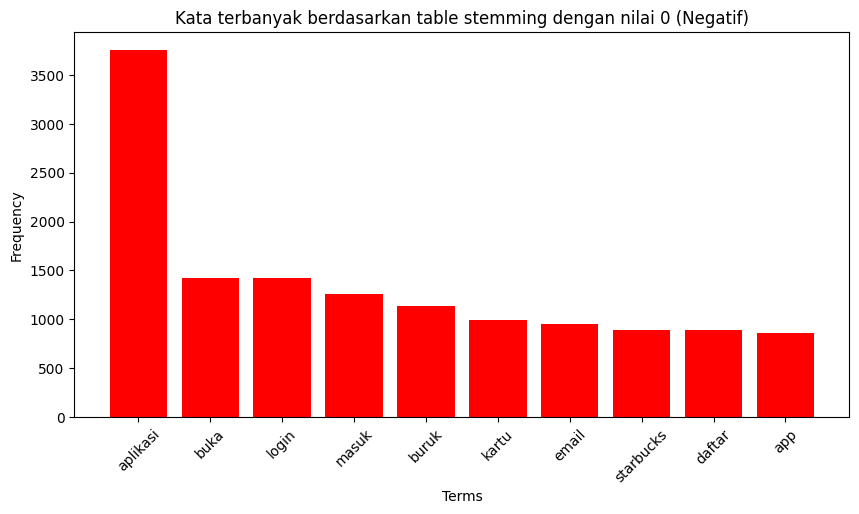

In [89]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


# Filter to get rows where label is 0
stemmed_texts = df[nb['sentiment'] == 0]['stemming_fix']

# Tokenize and count frequencies
word_counts = Counter()
for text in stemmed_texts:
    word_counts.update(text.split())

# Get the most common terms
most_common_words = word_counts.most_common(10)  # you can adjust the number

# Preparing data for plotting
words, counts = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='red')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Kata terbanyak berdasarkan table stemming dengan nilai 0 (Negatif)')
plt.xticks(rotation=45)
plt.show()


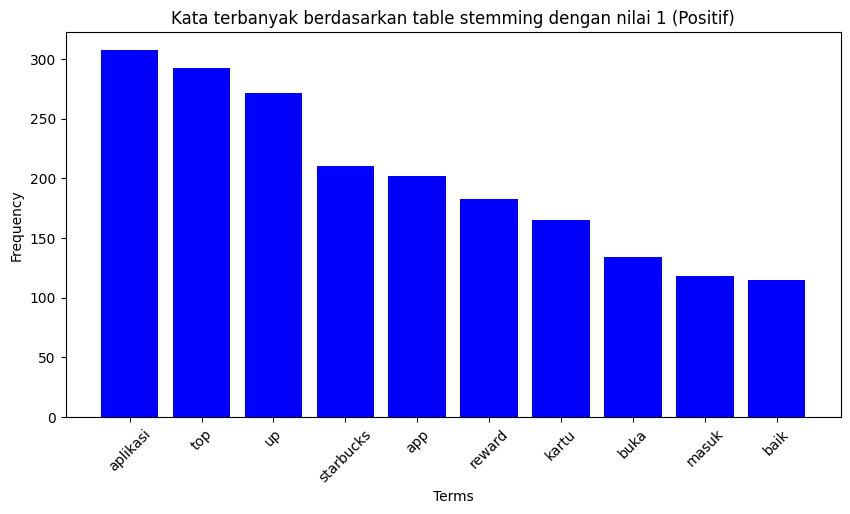

In [90]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


# Filter to get rows where label is 0
stemmed_texts = df[nb['sentiment'] == 1]['stemming']

# Tokenize and count frequencies
word_counts = Counter()
for text in stemmed_texts:
    word_counts.update(text.split())

# Get the most common terms
most_common_words = word_counts.most_common(10)  # you can adjust the number

# Preparing data for plotting
words, counts = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='blue')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Kata terbanyak berdasarkan table stemming dengan nilai 1 (Positif)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
sentiment_counts = df['sentiment'].value_counts()

# Membuat pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=['Sentimen 0', 'Sentimen 1'], autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Perbandingan Jumlah Data Sentimen')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [41]:
y_pred_nb = nb.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [45]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

clf = MultinomialNB()
clf.fit (X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNe Accuracy:", accuracy_score(y_test, predicted))
print("MultinomiaiNB Recall:", recall_score(y_test, predicted, average ="binary", pos_label="negatif"))
print("MultinomiaINB f1_score:", f1_score(y_test,predicted, average = "binary", pos_label="negatif"))
print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print(classification_report (y_test, predicted, zero_division=0))

MultinomialNe Accuracy: 0.9621270084162203


ValueError: pos_label=negatif is not a valid label. It should be one of ['negative', 'positive']

In [ ]:
# -----------------------------------JEDA BESAR-BESARAN-----------------------------------

In [11]:
tokenized_review=df['stemming'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [sumpah, aplikasi, amatir, verifikasi, otapi, ...
1    [gagas, aplikasi, bagus, guna, langgan, hadap,...
2    [mutakhir, aplikasi, jengkel, tidak, periksa, ...
3    [pin, inputnya, ganggu, etik, digit, keyboard,...
4    [aplikasi, tendang, aplikasi, pasuk, passcode,...
Name: stemming, dtype: object

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Define Indonesian stopwords
indonesian_stopwords = ["ada","adanya","adalah","adapun","agak","agaknya","agar","akan","akankah","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","diantaranya","antara","antaranya","diantara","apa","apaan","mengapa","apabila","apakah","apalagi","apatah","atau","ataukah","ataupun","bagai","bagaikan","sebagai","sebagainya","bagaimana","bagaimanapun","sebagaimana","bagaimanakah","bagi","bahkan","bahwa","bahwasanya","sebaliknya","banyak","sebanyak","beberapa","seberapa","begini","beginian","beginikah","beginilah","sebegini","begitu","begitukah","begitulah","begitupun","sebegitu","belum","belumlah","sebelum","sebelumnya","sebenarnya","berapa","berapakah","berapalah","berapapun","betulkah","sebetulnya","biasa","biasanya","bila","bilakah","bisa","bisakah","sebisanya","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","cuma","percuma","dahulu","dalam","dan","dapat","dari","daripada","dekat","demi","demikian","demikianlah","sedemikian","dengan","depan","di","dia","dialah","dini","diri","dirinya","terdiri","dong","dulu","enggak","enggaknya","entah","entahlah","terhadap","terhadapnya","hal","hampir","hanya","hanyalah","harus","haruslah","harusnya","seharusnya","hendak","hendaklah","hendaknya","hingga","sehingga","ia","ialah","ibarat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jangan","jangankan","janganlah","jika","jikalau","juga","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","dikarenakan","karena","karenanya","ke","kecil","kemudian","kenapa","kepada","kepadanya","ketika","seketika","khususnya","kini","kinilah","kiranya","sekiranya","kita","kitalah","kok","lagi","lagian","selagi","lah","lain","lainnya","melainkan","selaku","lalu","melalui","terlalu","lama","lamanya","selama","selamanya","lebih","terlebih","bermacam","macam","semacam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masih","masihkah","semasih","masing","mau","maupun","semaunya","memang","mereka","merekalah","meski","meskipun","semula","mungkin","mungkinkah","nah","namun","nanti","nantinya","nyaris","oleh","olehnya","seorang","seseorang","pada","padanya","padahal","paling","sepanjang","pantas","sepantasnya","sepantasnyalah","para","pasti","pastilah","per","pernah","pula","pun","merupakan","rupanya","serupa","saat","saatnya","sesaat","saja","sajalah","saling","bersama","sama","sesama","sambil","sampai","sana","sangat","sangatlah","saya","sayalah","se","sebab","sebabnya","sebuah","tersebut","tersebutlah","sedang","sedangkan","sedikit","sedikitnya","segala","segalanya","segera","sesegera","sejak","sejenak","sekali","sekalian","sekalipun","sesekali","sekaligus","sekarang","sekitar","sekitarnya","sela","selain","selalu","seluruh","seluruhnya","semakin","sementara","sempat","semua","semuanya","sendiri","sendirinya","seolah","seperti","sepertinya","sering","seringnya","serta","siapa","siapakah","siapapun","disini","disinilah","sini","sinilah","sesuatu","sesuatunya","suatu","sesudah","sesudahnya","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tak","tanpa","setelah","telah","tentang","tentu","tentulah","tentunya","tertentu","seterusnya","tapi","tetapi","setiap","tiap","setidaknya","toh","waduh","wah","wahai","sewaktu","walau","walaupun","wong","yaitu","yakni","yang"]  # Add more stopwords as needed

# Initialize RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Initialize CountVectorizer with Indonesian stopwords
cv = CountVectorizer(stop_words=indonesian_stopwords, tokenizer=token.tokenize)

# Assuming 'nb['review']' contains your text data
text_counts = cv.fit_transform(df['stemming'])

C:\Users\KARINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

In [15]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 96.17%
------------------------------------------------
Confusion Matrix:
      0    1
0  2335   48
1    52  179
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    negative       0.98      0.98      0.98      2383
    positive       0.79      0.77      0.78       231

    accuracy                           0.96      2614
   macro avg       0.88      0.88      0.88      2614
weighted avg       0.96      0.96      0.96      2614



In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

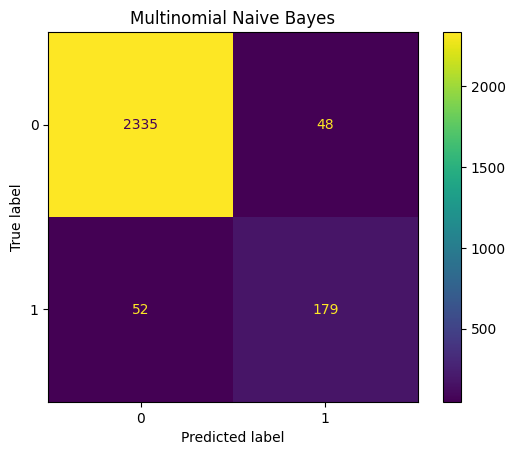

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# I'm assuming CNB, MNB, BNB are your classifier instances and X_test, y_test are your test data
k = [MNB]
classifier_names = ["Multinomial Naive Bayes"]  # Names for the classifiers for display purposes

for classifier, name in zip(k, classifier_names):
    # Make predictions
    y_pred = classifier.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create the ConfusionMatrixDisplay instance
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Use the plotting method
    disp.plot()
    plt.title(name)
    plt.show()


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(df['stemming'])

In [72]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, df['sentiment'],test_size=0.20,random_state=30)

In [73]:
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('accuracy score multinomial naive bayes = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy score multinomial naive bayes = 95.14%


In [74]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in df["stemming"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,aplikasi,4058
1,buka,1561
2,login,1505
3,masuk,1382
4,baik,1188
5,kartu,1161
6,starbucks,1101
7,app,1060
8,email,1019
9,daftar,912


In [75]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)